# Rede Neural do Zero

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
Dados = pd.read_csv('Datasets/banknote/data_banknote_authentication.csv')
Dados = Dados.to_numpy()
Dados

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [4]:
m, n = Dados.shape # m número de linhas (amostras) n número de colunas
n0 = n - 1 #n0 número de  (variáveis de entrada/dimensões)

In [5]:
randseq = np.random.permutation(m)
dados = Dados[randseq[0:m], 0:n]

In [6]:
dados

array([[-1.4106 , -7.108  ,  5.6454 ,  0.31335,  1.     ],
       [-2.2527 , 11.5321 ,  2.5899 , -3.2737 ,  0.     ],
       [-1.5252 , -6.2534 ,  5.3524 ,  0.59912,  1.     ],
       ...,
       [-1.3885 , 12.5026 ,  0.69118, -7.5487 ,  0.     ],
       [-5.873  ,  9.1752 , -0.27448, -6.0422 ,  1.     ],
       [ 0.56953,  7.6294 ,  1.5754 , -3.2233 ,  0.     ]])

In [7]:
#Separar dados de cliente 
train_num = math.floor(m*0.8) 
test_num = m - train_num

print(train_num, test_num)

1097 275


In [8]:
#Separa
x_train = dados[0: train_num, 0:n0].T
y_train = dados[0:train_num, n0]

x_test = dados[train_num:m+1, 0:n0].T
y_test = dados[train_num:m+1, n0]

In [9]:
x_train[:, 0:6]

array([[ -1.4106 ,  -2.2527 ,  -1.5252 ,   5.262  ,  -3.793  ,   2.805  ],
       [ -7.108  ,  11.5321 ,  -6.2534 ,   3.9834 , -12.7095 ,   0.57732],
       [  5.6454 ,   2.5899 ,   5.3524 ,  -1.5572 ,  12.7957 ,   1.3424 ],
       [  0.31335,  -3.2737 ,   0.59912,   1.0103 ,  -2.825  ,   1.2133 ]])

In [10]:
# Função de ativação sigmoide
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

In [11]:
L = 4 #número de camadas da rede (1 camada de entrada (4 neurônios) , 2 camadas ocultas (5 neurônios cada) e 1 camada de saída com um neurônio
neurons = np.array([n0, 5, 5, 1]) #neurônios por camada em sequência

# inicialização dos parâmetros de modelo
W1 = np.random.randn(neurons[1],neurons[0]) #primeira camada oculta matriz 5x4 (neurons[1]=5 e neurons[0]=n0=4 neste caso)
b1 = np.random.randn(neurons[1],1) #5x1

W2 = np.random.randn(neurons[2],neurons[1]) #5x5
b2 = np.random.randn(neurons[2],1) #5x1

W3 = np.random.randn(neurons[3],neurons[2]) #1x5
b3 = np.random.randn(neurons[3],1) #1x1

In [12]:
W1

array([[ 0.30524199, -0.26777856, -0.01349396, -1.29233626],
       [ 0.0415815 ,  0.00230833,  0.78828211, -1.78762267],
       [-0.19393139,  0.85290245, -1.30794598, -0.29450318],
       [ 0.81447121,  0.93317653,  1.69387234, -0.65976988],
       [-0.25427567,  1.25857309,  1.55377484, -1.94912448]])

In [13]:
# Hiper-Parâmetros
learning_rate = 0.01
iterations = 2000

# Inicialização de variávies
Z1 = np.zeros([neurons[1], train_num])
A1 = np.zeros([neurons[1], train_num])

Z2 = np.zeros([neurons[2], train_num])
A2 = np.zeros([neurons[2], train_num])

Z3 = np.zeros([neurons[3], train_num])
A3 = np.zeros([neurons[3], train_num])

In [14]:
# Treinamento
train_loss = np.zeros((iterations,1))
train_accuracy = np.zeros((iterations,1))

for i in range(iterations):

    # Forward Propagation
    Z1 = np.dot(W1, x_train) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Metrics computation
    pred_train = A3 > 0.5
    train_accuracy[i] = 1 - np.sum(abs(pred_train - y_train))/train_num   

    train_loss[i] = (-1/train_num)*np.sum(y_train*np.log(A3) + (1-y_train)*np.log(1-A3))

    print(f'Iteration: {i+1}, Loss: {train_loss[i]}, Accuracy: {train_accuracy[i]}')

    # Backward Propagation
    dZ3 = A3-y_train
    dW3 = (1/train_num)*np.dot(dZ3, A2.T)
    db3 = (1/train_num)*np.sum(dZ3, axis = 1, keepdims = True)

    dA2 = A2*(1-A2)
    dZ2 = np.dot(W3.T, dZ3)*dA2
    dW2 = (1/train_num)*np.dot(dZ2, A1.T)
    db2 = (1/train_num)*np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = A1*(1-A1)
    dZ1 = np.dot(W2.T, dZ2)*dA1
    dW1 = (1/train_num)*np.dot(dZ1, x_train.T)
    db1 = (1/train_num)*np.sum(dZ1, axis = 1, keepdims = True)

    # Atualizações do modelo
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1

    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3

Iteration: 1, Loss: [1.68616248], Accuracy: [0.44120328]
Iteration: 2, Loss: [1.67959979], Accuracy: [0.44120328]
Iteration: 3, Loss: [1.67306175], Accuracy: [0.44120328]
Iteration: 4, Loss: [1.6665484], Accuracy: [0.44120328]
Iteration: 5, Loss: [1.66005977], Accuracy: [0.44120328]
Iteration: 6, Loss: [1.65359591], Accuracy: [0.44120328]
Iteration: 7, Loss: [1.64715687], Accuracy: [0.44120328]
Iteration: 8, Loss: [1.64074267], Accuracy: [0.44120328]
Iteration: 9, Loss: [1.63435337], Accuracy: [0.44120328]
Iteration: 10, Loss: [1.627989], Accuracy: [0.44120328]
Iteration: 11, Loss: [1.62164961], Accuracy: [0.44120328]
Iteration: 12, Loss: [1.61533523], Accuracy: [0.44120328]
Iteration: 13, Loss: [1.60904591], Accuracy: [0.44120328]
Iteration: 14, Loss: [1.60278168], Accuracy: [0.44120328]
Iteration: 15, Loss: [1.59654258], Accuracy: [0.44120328]
Iteration: 16, Loss: [1.59032865], Accuracy: [0.44120328]
Iteration: 17, Loss: [1.58413994], Accuracy: [0.44120328]
Iteration: 18, Loss: [1.57

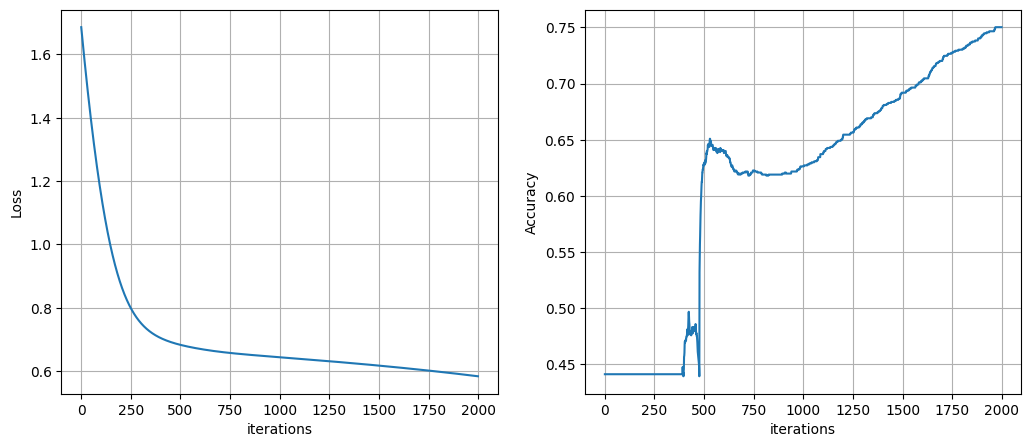

In [15]:
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Accuracy')

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.5, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()